In [1]:
from pathlib import Path

import pyparsing as pp

mess_inp_file = Path("ene_mess.inp")
spc_file = Path("ene_species.csv")

In [2]:
from mess_io_proto import surface

surf = surface.from_mess(mess_inp_file, spc_inp=spc_file)
surf = surface.with_energies_relative_to(surf, 25)
surf = surface.without_fake_wells(surf)
surf = surface.remove_well(surf, 10)
surface.display_network(surf)


Path 1
C5H7(504) + O2(6)	0.0000	-0.5
S(602)	-31.0800	0.0
ts_1_13	-1.5300	0.5
S(1210)r0	-29.9300	1.0
ts_1_21	-10.8500	1.5
OH(4) + S(1288)rs0	-31.4700	2.0

Path 2
S(1210)r0	-29.9300	1.0
ts_1_11	11.7600	1.5
C5H6O(645)z + OH(4)	-41.8300	2.0

Path 3
S(602)	-31.0800	0.0
ts_1_24	-2.9300	1.0
C5H6(478) + HO2(8)	-15.4600	2.0

Path 4
S(1210)r0	-29.9300	1.0
ts_1_27	-8.6300	1.5
C5H6(478) + HO2(8)	-15.4600	2.0

Path 5
S(1210)r0	-29.9300	1.0
ts_1_20	17.6100	1.5
C5Oqidgnvrs + OH(4)	-9.0800	2.0


<Figure size 1000x500 with 0 Axes>

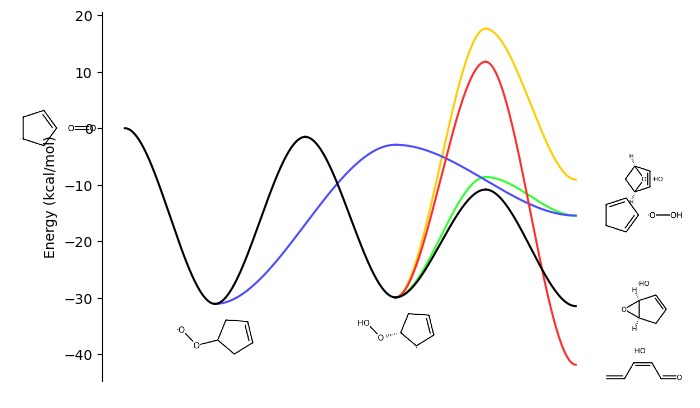

In [6]:
from importlib import reload

from matplotlib import pyplot

reload(surface)

size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()


class Color:
    black = "#000000"
    gray1 = "#808080FF"
    gray2 = "#BFBFBFFF"
    red = "#FF2E2EFF"
    blue = "#4D4DFFFF"
    blue1 = "#9999ffff"
    green = "#31FF31FF"
    green1 = "#99ff99ff"
    yellow = "#ffcd00ff"


paths, colors = zip(
    ([25, 11, 1, 21], Color.black),
    # ([25, 11, 1, 10, 19], Color.red),
    ([25, 11, 1, 19], Color.red),
    ([25, 11, 20], Color.blue),
    ([25, 11, 1, 20], Color.green),
    ([25, 11, 1, 23], Color.yellow),
    strict=True,
)

fig = surface.plot_paths(
    surf,
    paths=paths,
    fig=fig,
    colors=colors,
    stereo=True,
    log_excel=True,
)

pyplot.savefig("plot_a.svg")

In [4]:
# path0 = surface.path_from_well_id_sequence(surf, [28, 0, 1, 22])
# path1 = surface.path_from_well_id_sequence(surf, [28, 0, 21])
# path1

In [5]:
# from importlib import reload

# from matplotlib import pyplot

# reload(surface)


# size = (10, 5)
# fig = pyplot.figure(figsize=size)
# fig = pyplot.figure()

# data0 = list(enumerate(path0))
# data1 = list(enumerate(path1))
# fig = surface.plot_path_data(data0, fig=fig, amchi_mapping=surf.amchi_mapping)
# fig = surface.plot_path_data(
#     data1, fig=fig, amchi_mapping=surf.amchi_mapping, color="red"
# )